 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv_path, index_col = 'Date',  parse_dates=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls, using inplace = True to change the original dataframe
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv_path,index_col = 'Date', parse_dates=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls, again using inplace = True to change original dataframe
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [25]:
# Reading S&P 500 Closing Prices
sp500_csv_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_csv_path, index_col='Date', parse_dates=True)

# sort dataframe by ascending to get dates in the same as order as three preceding dataframes
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df

/var/folders/j3/f2pn80cx63z808kw83_jxw3w0000gn/T/ipykernel_95973/993960267.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_csv_path, index_col='Date', parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [26]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [27]:
# Fix Data Types, by calling the replace method on the string attribute of the Close column of the dataframe, and chaining the astype method with a paramater of float to convert the strings holding numerical values into floats
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype(float)


In [29]:
# Calculate Daily Returns
# calling the pct_change method on Close column of the dataframe, and assigning it to a new variable to hold the change, and chain the to_frame method to convert the series back into a dataframe
# convert the Series 
sp500_returns_df = sp500_df['Close'].pct_change().to_frame()
sp500_returns_df

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [30]:
# Drop nulls using dropna method
sp500_returns_df = sp500_returns_df.dropna()

In [31]:
# Rename `Close` Column to be specific to this portfolio.
# call the rename method with a parameter of columns, which accepts a key value pair of the column name to be changed, and its replacement
sp500_returns_df = sp500_returns_df.rename(columns={'Close': 'S&P 500 Daily Returns'})
sp500_returns_df

,S&P 500 Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [34]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# use the pd.concat function and pass a list of dataframes as the first parameter, set axis=1 to join along columns, and join inner to perform an inner join 
merged_df = pd.concat([whale_df, algo_df, sp500_returns_df], axis=1, join="inner")
merged_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

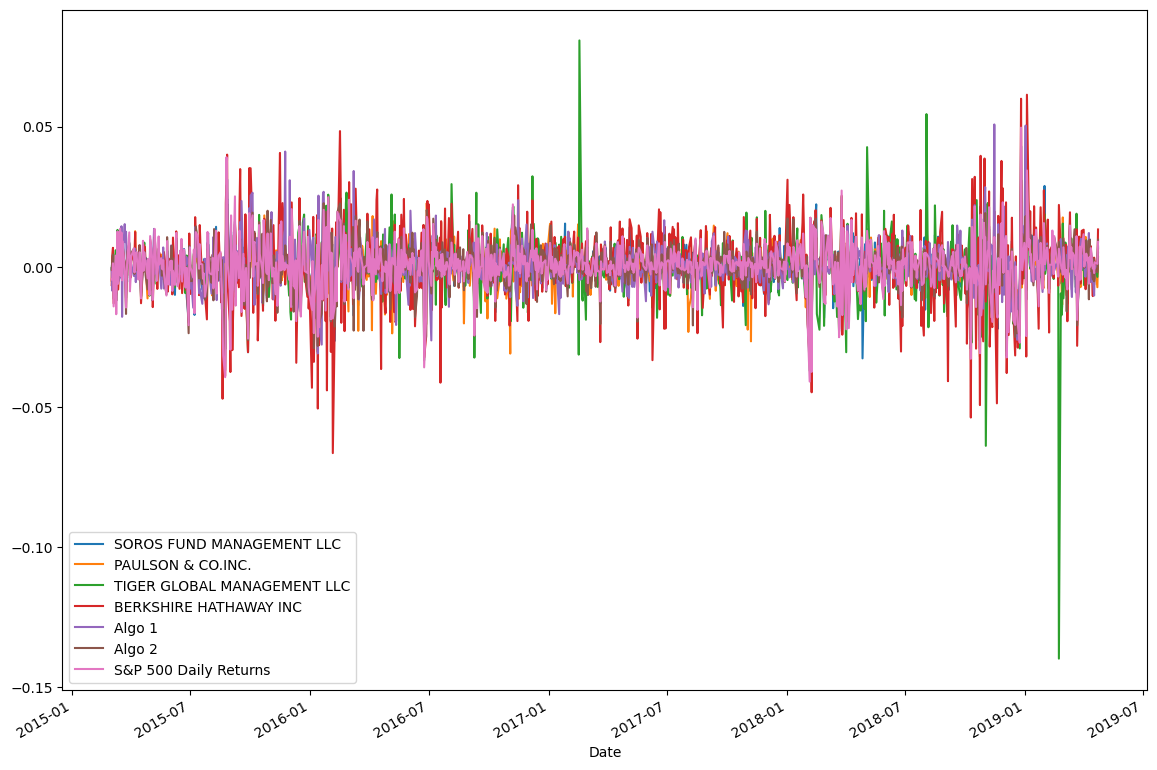

In [35]:
# Plot daily returns of all portfolios
# use .plot method with specified figsize to make chart more visible
merged_df.plot(figsize=(14,10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

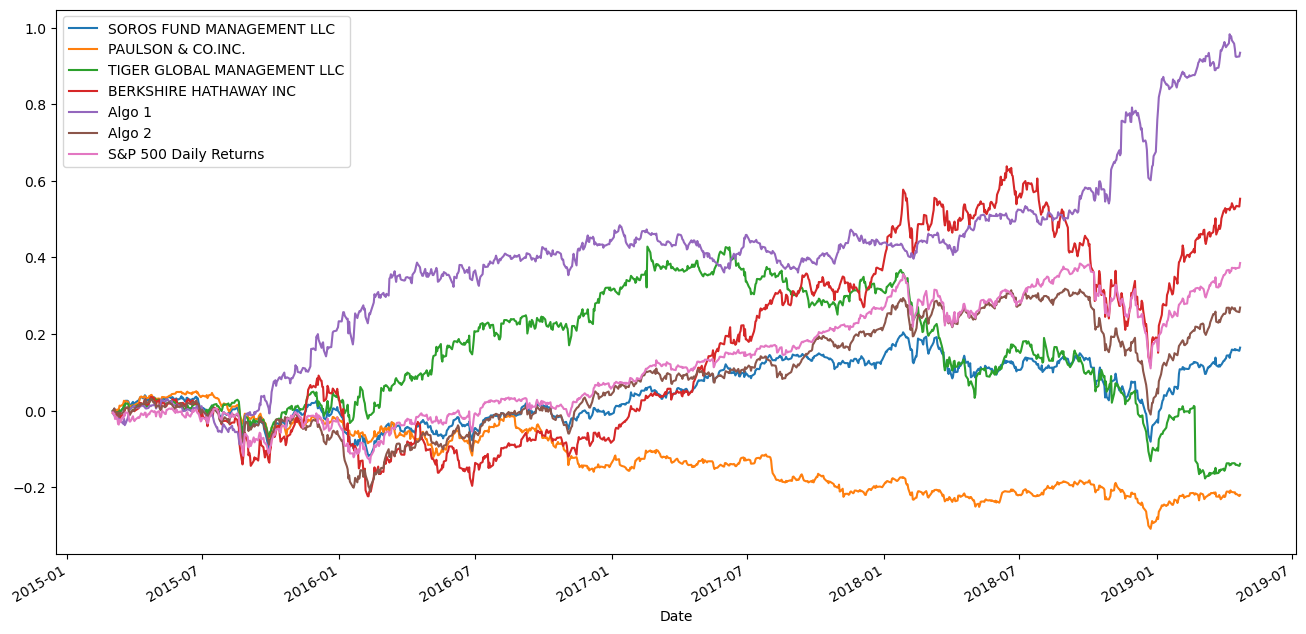

In [37]:
# Calculate cumulative returns of all portfolios
# perform cumulative returns calculation using the cumprod method 
cumulative_returns = (1 + merged_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(16,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


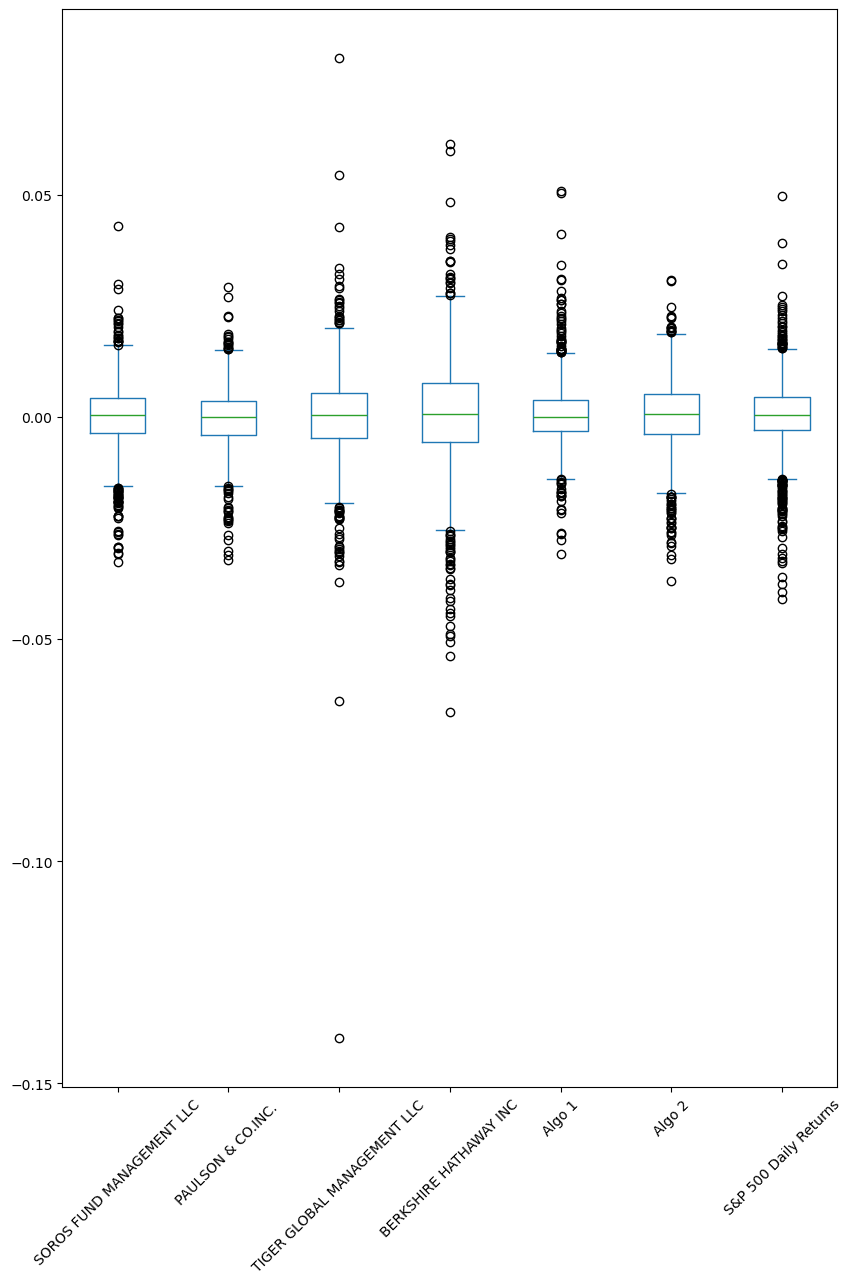

In [38]:
# Box plot to visually show risk
# use .plot method with kind paramater set equal to box and call plt.xticks to rotate names for better visualization
boxplot = merged_df.plot(kind='box', figsize=(10, 14))
plt.xticks(rotation=45)
plt.show()

### Calculate Standard Deviations

In [39]:
# Calculate the daily standard deviations of all portfolios
# call .std() method on merged dataframe and save to new variable
portfolio_volatility = merged_df.std()
portfolio_volatility

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500 Daily Returns          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [40]:
# Calculate  the daily standard deviation of S&P 500
# set new variable equal to portfolio volatility of the SP500 column
sp500_volatility = portfolio_volatility.loc['S&P 500 Daily Returns']

# Determine which portfolios are riskier than the S&P 500
# use a for loop to loop through port vols items and print whether the vol for the specified portfolio is greater than or less than the S&P500 (Market) vol
for portfolio, volatility in portfolio_volatility.items():
    if portfolio != 'S&P 500 Daily Returns':
        if volatility > sp500_volatility:
            print(f"Portfolio {portfolio} is RISKIER than the market")
        else:
            print(f"Portfolio {portfolio} is NOT RISKIER than the market")  

Portfolio SOROS FUND MANAGEMENT LLC is NOT RISKIER than the market
Portfolio PAULSON & CO.INC.  is NOT RISKIER than the market
Portfolio TIGER GLOBAL MANAGEMENT LLC is RISKIER than the market
Portfolio BERKSHIRE HATHAWAY INC is RISKIER than the market
Portfolio Algo 1 is NOT RISKIER than the market
Portfolio Algo 2 is NOT RISKIER than the market


### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized standard deviation (252 trading days)
# multiply daily volatility variable by square root of 252 to annualize (for 252 trading days) the returns 
portfolio_volatility_annualized = portfolio_volatility * np.sqrt(252)
portfolio_volatility_annualized

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500 Daily Returns          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

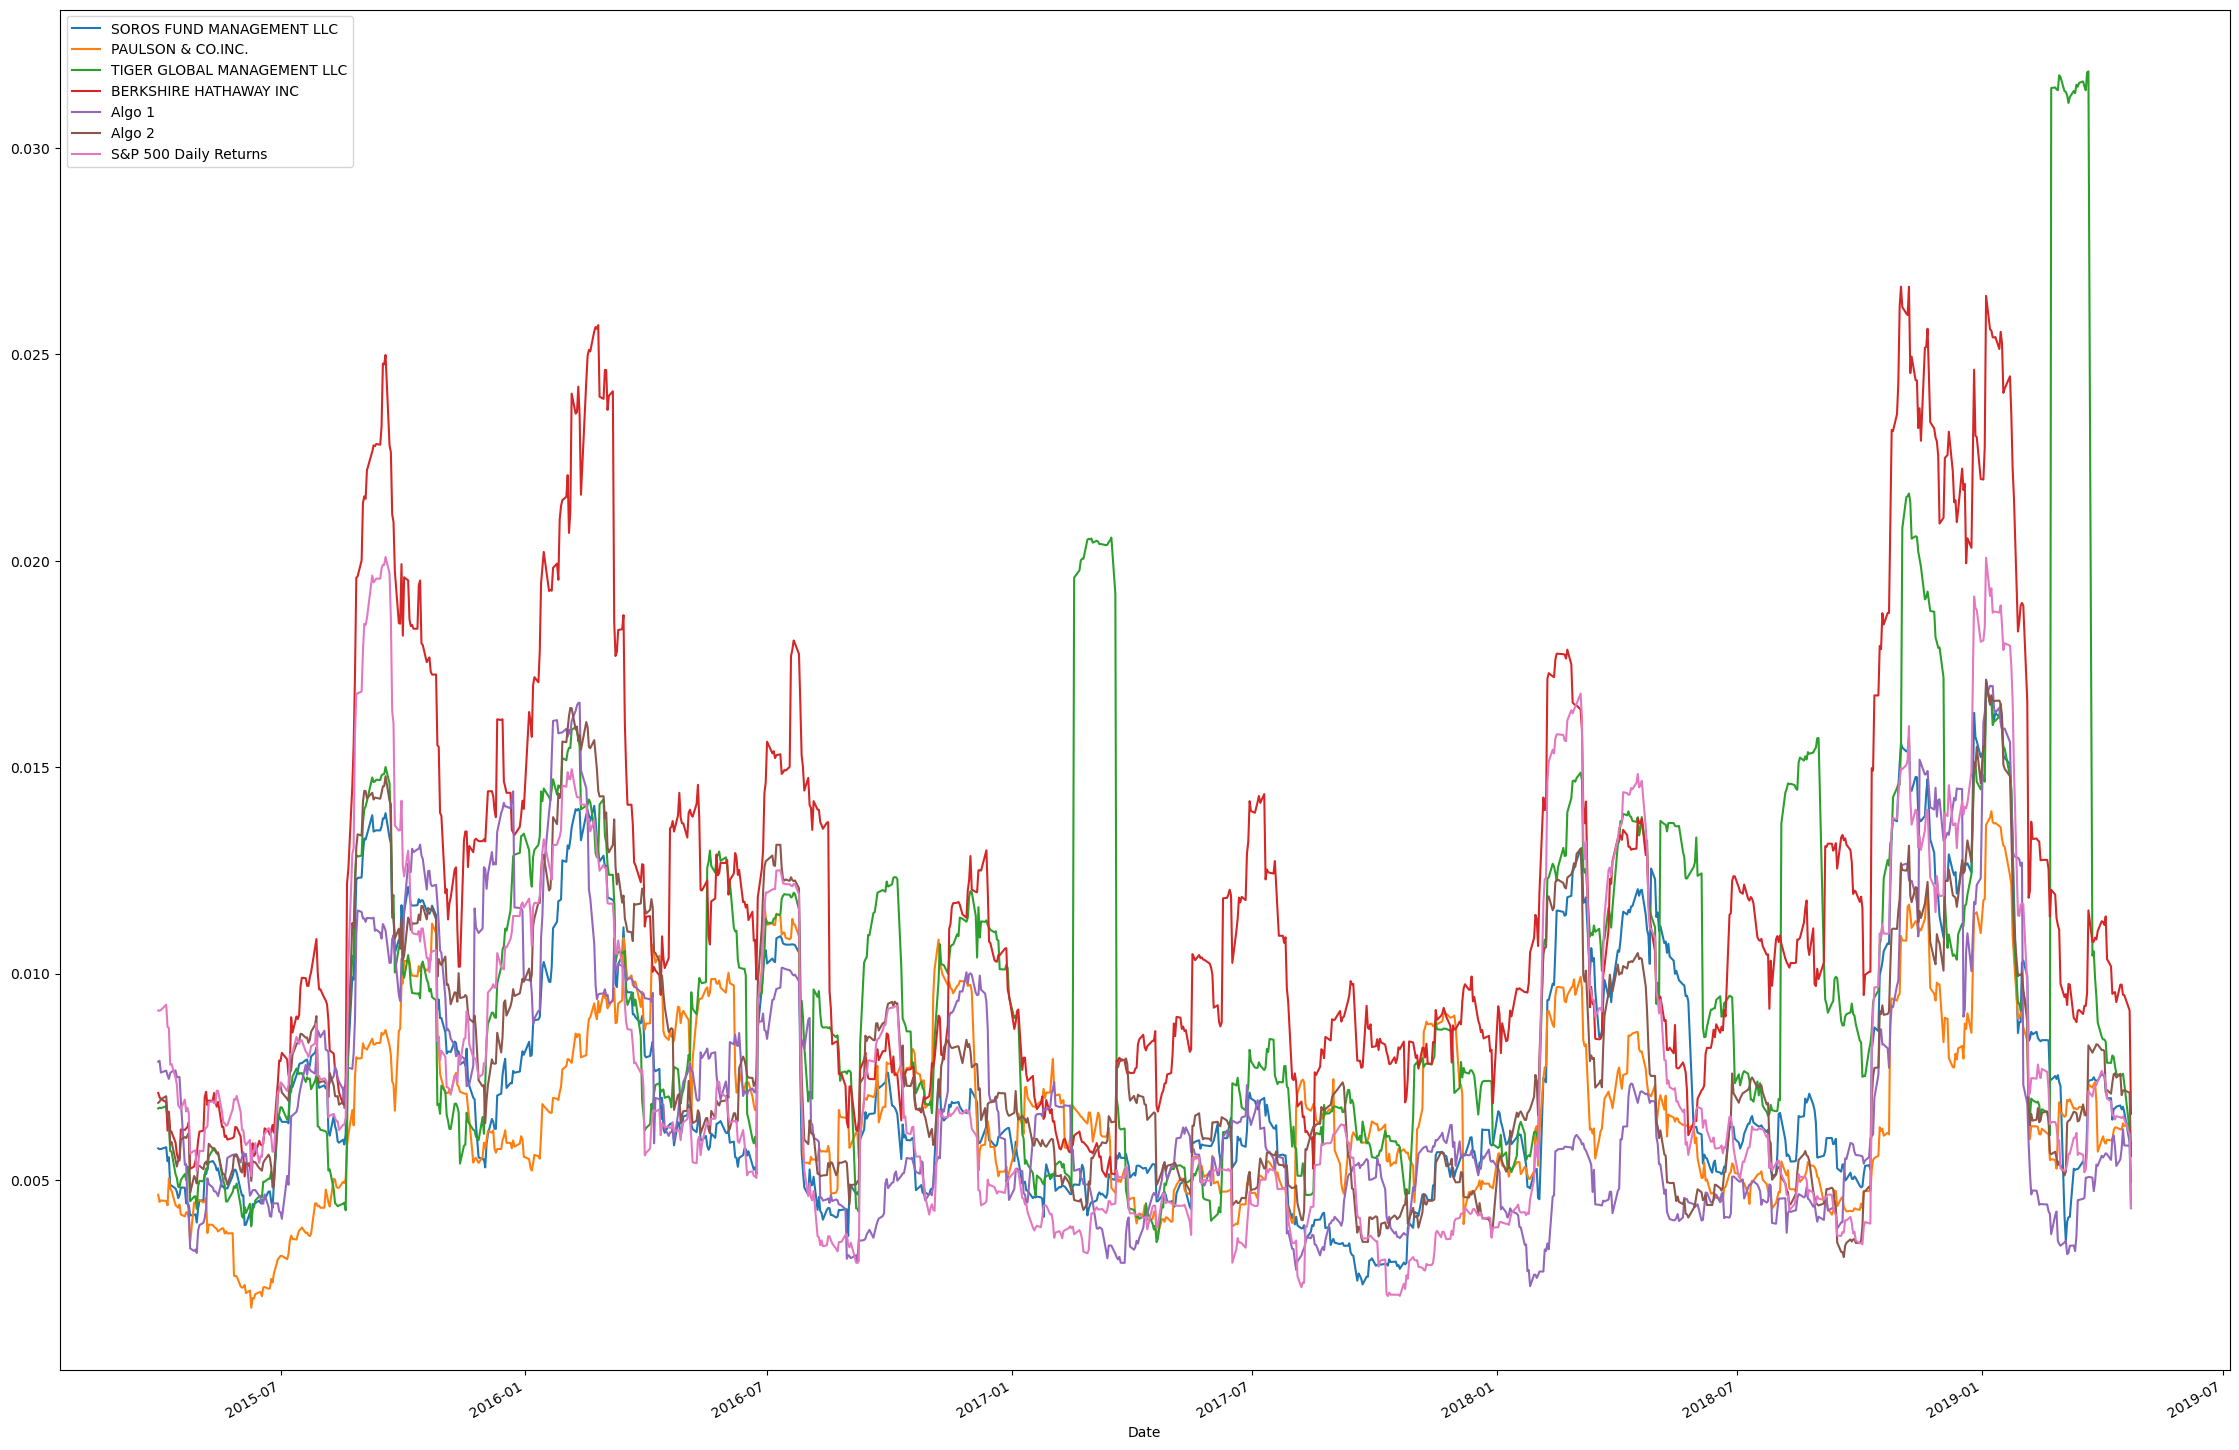

In [43]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# call rolling method with window set to 21 and chain std method
portfolio_volatility_std_21d = merged_df.rolling(window=21).std()

# Plot the rolling standard deviation
portfolio_volatility_std_21d.plot(figsize=(28,20))

### Calculate and plot the correlation

In [44]:
# Calculate the correlation
# call corr method on daily returns dataframe
portfolio_correlation = merged_df.corr()
# Display de correlation matrix
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500 Daily Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

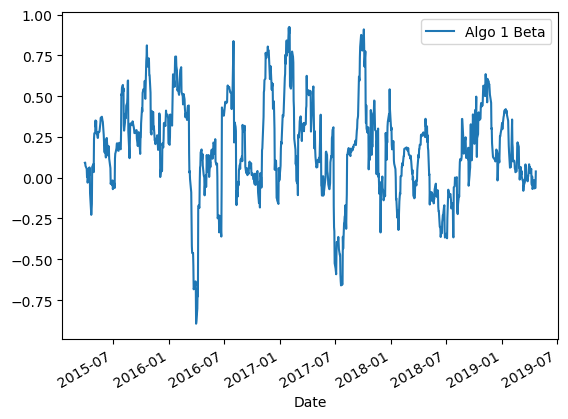

In [49]:
# Calculate covariance of a single portfolio
# use the rolling window from above (21) to calculate the covariance, to be able to visualize the trend over time
covariance_algo1_rolling = merged_df['Algo 1'].rolling(window=21).cov(merged_df['S&P 500 Daily Returns'])

# Calculate variance of S&P 500, using .rolling method chained with .var method
variance_rolling = merged_df['S&P 500 Daily Returns'].rolling(window=21).var()

# Computing beta
# divide the covariance by the variance to get the relationship (beta) of the correlation between the single portfolio and the market portfolio
algo1_beta_rolling = covariance_algo1_rolling / variance_rolling
algo1_beta_rolling

# Plot beta trend
# save plot to variable ax so we can call legend next to name the plot
ax = algo1_beta_rolling.plot()

# call .legend to display legend
ax.legend(['Algo 1 Beta'])


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

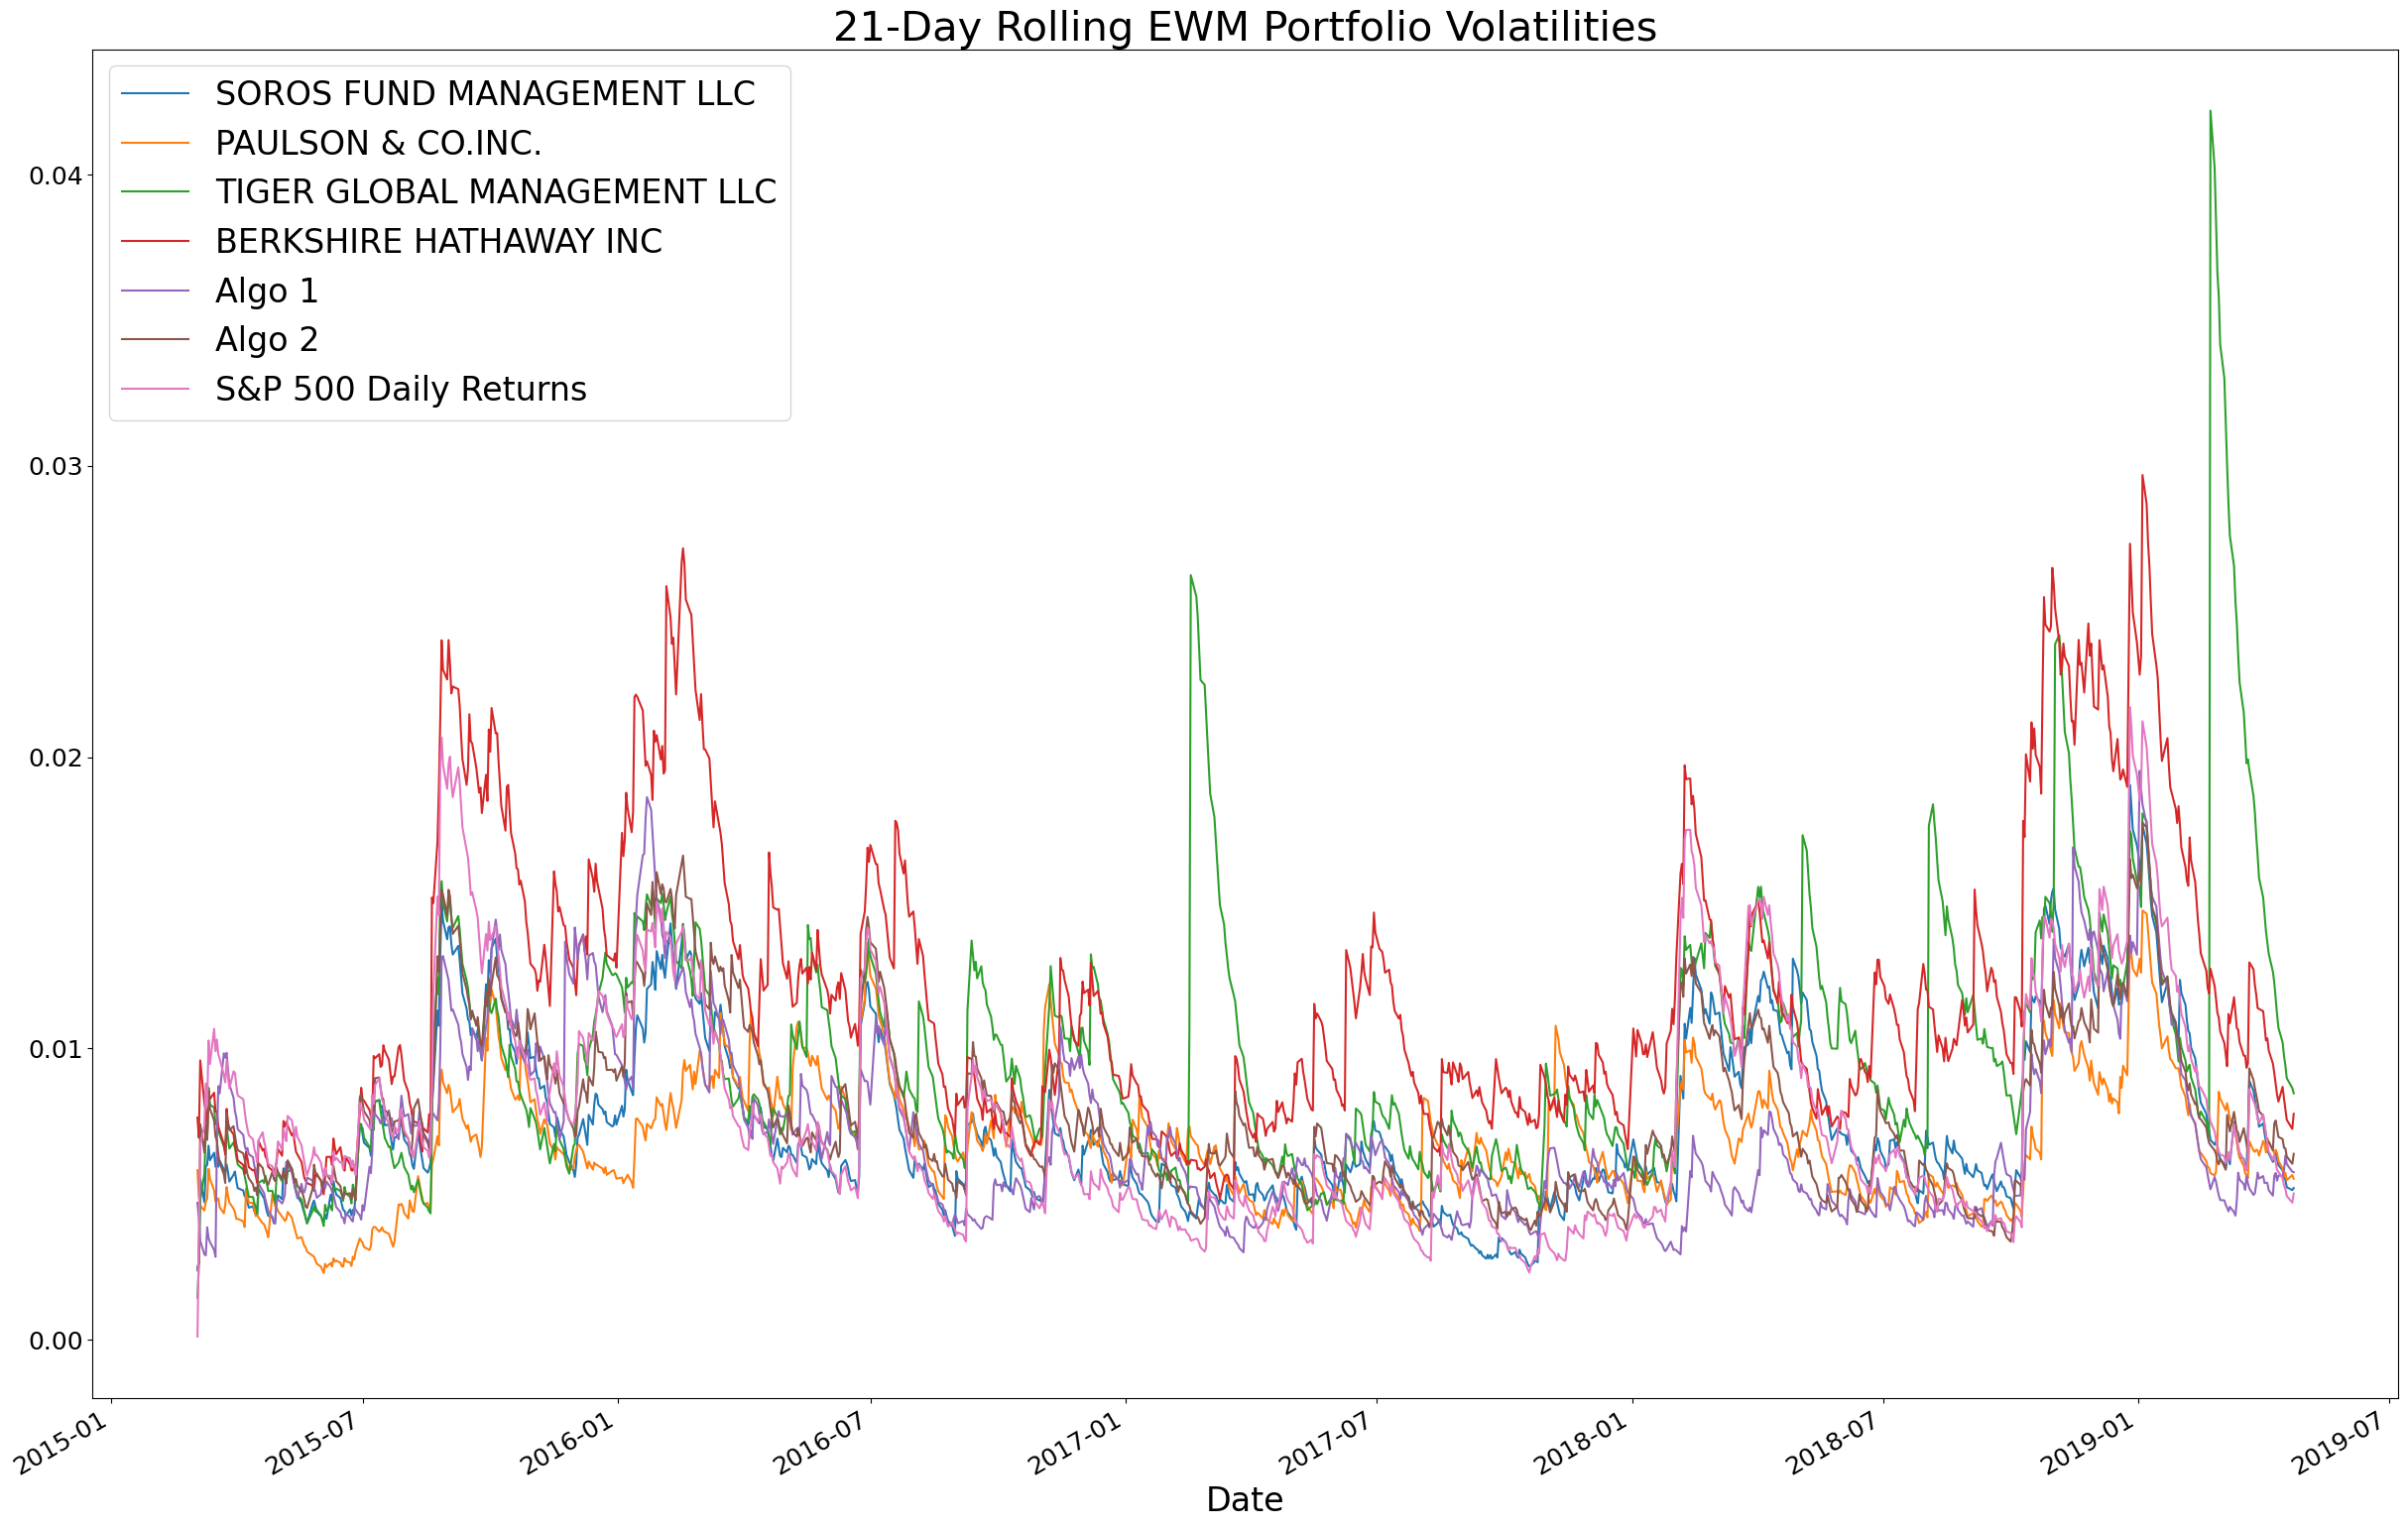

In [51]:
# Use `ewm` to calculate the rolling window
# use .ewm instead of .rolling to get exponentially weighted rolling vol with span size of 21
portfolio_volatility_ewm_21d = merged_df.ewm(span=21).std()

# specify extra paramaters to further describe and annotate the plot
ax = portfolio_volatility_ewm_21d.plot(figsize=(30,20))
ax.legend(fontsize=24)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.xlabel('Date', fontsize=24)
plt.title('21-Day Rolling EWM Portfolio Volatilities', fontsize=30)
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Annualized Sharpe Ratios
# get annualized daily returns by calling .mean on daily returns dataframe and multiplying by 252
daily_return_annualized = merged_df.mean() * 252

# save market returns annualized to new variable
benchmark_return_annualized = daily_return_annualized['S&P 500 Daily Returns']

# perform sharpe ratio calc and save to new variable
sharpe_ratios = (daily_return_annualized - benchmark_return_annualized )/ portfolio_volatility_annualized
sharpe_ratios




SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
Algo 1                         0.650964
Algo 2                        -0.163336
S&P 500 Daily Returns          0.000000
dtype: float64

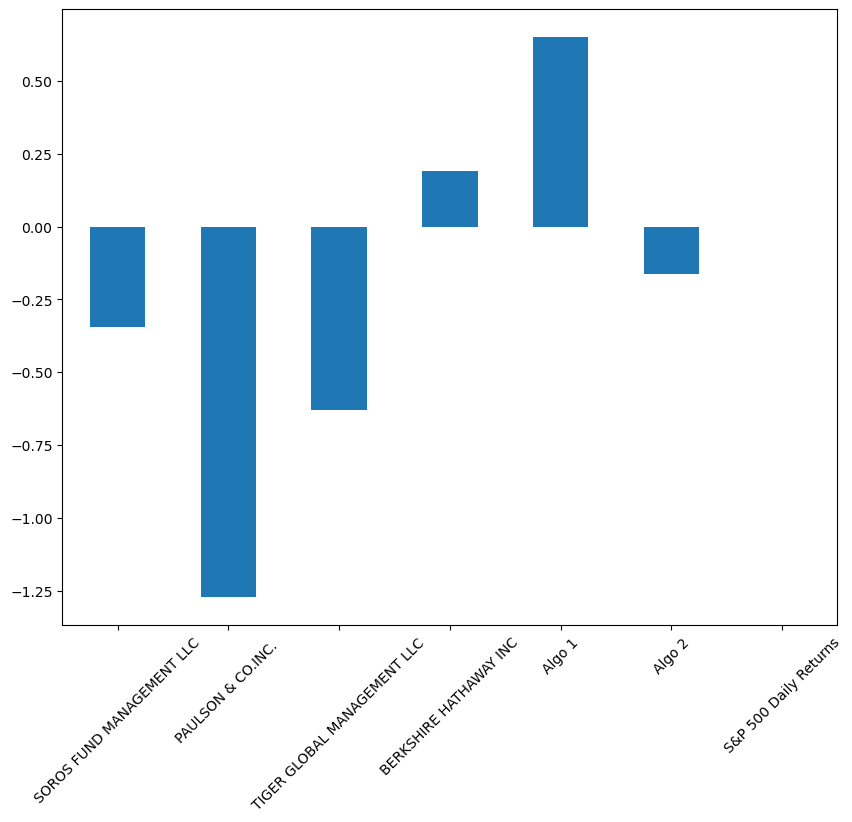

In [55]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(10, 8))

plt.xticks(rotation=45)
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 is the clear choice here:
- In terms of Risk, it far outperforms all other portfolios, as well as the market.
- Algo 1 is also much less correlated to the market than the other portfolios, and also less correlated to the other portfolios overall
- Algo 1 is also the only portfolio other than Berkshire that has a cumulative return higher than the benchmark, making it both much better of a performer than the whale portfolios on a cumulative return basis and on a risk-adjusted basis

Algo 2 is better than 3 out of 4 whale portfolios on a Risk-Adjusted basis, but falls short of the market portfolios Sharpe Ratio, making it more worth it to put your money in an index fund. It also shows extremely high correlation to the market and moderate-to-high correlation to the other portfolios, and on a cumulative basis, slightly underperforms the market, even though it outperforms 3 of the 4 whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [56]:
# Reading data from 1st stock
ko_csv_path = Path("Resources/ko_close.csv")
ko_df = pd.read_csv(ko_csv_path, index_col = 'Date', parse_dates=True)
ko_df

,Close
Date,
2015-03-03 16:00:00,42.95
2015-03-04 16:00:00,42.50
2015-03-05 16:00:00,42.40
2015-03-06 16:00:00,41.52
2015-03-09 16:00:00,41.39
...,...
2019-04-15 16:00:00,47.00
2019-04-16 16:00:00,46.95
2019-04-17 16:00:00,47.28


In [57]:
# Reading data from 2nd stock
t_csv_path = Path("Resources/t_close.csv")
t_df = pd.read_csv(t_csv_path, index_col = 'Date', parse_dates=True)
t_df

,Close
Date,
2015-03-03 16:00:00,25.97
2015-03-04 16:00:00,25.66
2015-03-05 16:00:00,25.66
2015-03-06 16:00:00,25.27
2015-03-09 16:00:00,25.17
...,...
2019-04-15 16:00:00,24.17
2019-04-16 16:00:00,24.34
2019-04-17 16:00:00,24.11


In [58]:
# Reading data from 3rd stock
nvda_csv_path = Path("Resources/nvda_close.csv")
nvda_df = pd.read_csv(nvda_csv_path, index_col = 'Date', parse_dates=True)
nvda_df


,Close
Date,
2015-03-03 16:00:00,5.55
2015-03-04 16:00:00,5.61
2015-03-05 16:00:00,5.72
2015-03-06 16:00:00,5.64
2015-03-09 16:00:00,5.65
...,...
2019-04-15 16:00:00,46.18
2019-04-16 16:00:00,47.05
2019-04-17 16:00:00,46.82


In [59]:
# Combine all stocks in a single DataFrame
# perform pd.concat functoin with new stocks as list and axis=1 to join across columns and join = inner to do inner join
merged_stocks_df = pd.concat([ko_df, t_df, nvda_df], axis=1, join='inner')

merged_stocks_df


,Close,Close,Close
Date,,,
2015-03-03 16:00:00,42.95,25.97,5.55
2015-03-04 16:00:00,42.50,25.66,5.61
2015-03-05 16:00:00,42.40,25.66,5.72
2015-03-06 16:00:00,41.52,25.27,5.64
2015-03-09 16:00:00,41.39,25.17,5.65
...,...,...,...
2019-04-15 16:00:00,47.00,24.17,46.18
2019-04-16 16:00:00,46.95,24.34,47.05
2019-04-17 16:00:00,47.28,24.11,46.82


In [60]:
# Reset Date index
# set the merged stocks dataframe index equal to the index with the normalize method, to remove the timestamps from the dates
merged_stocks_df.index = merged_stocks_df.index.normalize()
merged_stocks_df

,Close,Close,Close
Date,,,
2015-03-03,42.95,25.97,5.55
2015-03-04,42.50,25.66,5.61
2015-03-05,42.40,25.66,5.72
2015-03-06,41.52,25.27,5.64
2015-03-09,41.39,25.17,5.65
...,...,...,...
2019-04-15,47.00,24.17,46.18
2019-04-16,46.95,24.34,47.05
2019-04-17,47.28,24.11,46.82


In [61]:
# Reorganize portfolio data by having a column per symbol
# specificy the index positions of the values of the columns attributes and set equal to strings of the replacement column names

merged_stocks_df.columns.values[0] = 'KO Close'
merged_stocks_df.columns.values[1] = 'T Close'
merged_stocks_df.columns.values[2] = 'NVDA Close'

merged_stocks_df

,KO Close,T Close,NVDA Close
Date,,,
2015-03-03,42.95,25.97,5.55
2015-03-04,42.50,25.66,5.61
2015-03-05,42.40,25.66,5.72
2015-03-06,41.52,25.27,5.64
2015-03-09,41.39,25.17,5.65
...,...,...,...
2019-04-15,47.00,24.17,46.18
2019-04-16,46.95,24.34,47.05
2019-04-17,47.28,24.11,46.82


In [64]:
# Calculate daily returns by calling pct_change method on merged dataframe and setting equal to new variable
daily_stock_returns_df = merged_stocks_df.pct_change()
# Drop NAs with dropna method
daily_stock_returns_df.dropna(inplace=True)
# Display sample data with .head method
daily_stock_returns_df.head()

,KO Close,T Close,NVDA Close
Date,,,
2015-03-04,-0.010477,-0.011937,0.010811
2015-03-05,-0.002353,0.000000,0.019608
2015-03-06,-0.020755,-0.015199,-0.013986
2015-03-09,-0.003131,-0.003957,0.001773
2015-03-10,-0.016912,-0.017084,0.017699


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [65]:
# Set weights as list of floats
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return using .dot method with weights as the parameter
stock_portfolio_returns = daily_stock_returns_df.dot(weights)
# Display sample data with .head method
stock_portfolio_returns.head()

Date
2015-03-04   -0.003868
2015-03-05    0.005752
2015-03-06   -0.016646
2015-03-09   -0.001772
2015-03-10   -0.005432
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [68]:
# Join your returns DataFrame to the original returns DataFrame

# use concat to join the dataframes
total_daily_returns = pd.concat([merged_df, stock_portfolio_returns], axis=1)

# rename the last column by referencing the name (which is int 0 and setting equal to string Stock Portfolio)
total_daily_returns = total_daily_returns.rename(columns={0: 'Stock Portfolio'})
total_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns,Stock Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.003868
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.005752
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016646
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.001772
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008270
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.002436
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.000531


In [69]:
# Only compare dates where return data exists for all the stocks (drop NaNs) using .dropna method
total_daily_returns = total_daily_returns.dropna()
total_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns,Stock Portfolio
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.003868
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.005752
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016646
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.001772
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.005432
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,-0.009192
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008270
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.002436


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized `std` by using .std method on merged dataframe
portfolio_volatility_with_stocks = total_daily_returns.std()
portfolio_volatility_with_stocks

SOROS FUND MANAGEMENT LLC      0.007904
PAULSON & CO.INC.              0.007030
TIGER GLOBAL MANAGEMENT LLC    0.010906
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007615
Algo 2                         0.008349
S&P 500 Daily Returns          0.008561
Stock Portfolio                0.011708
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

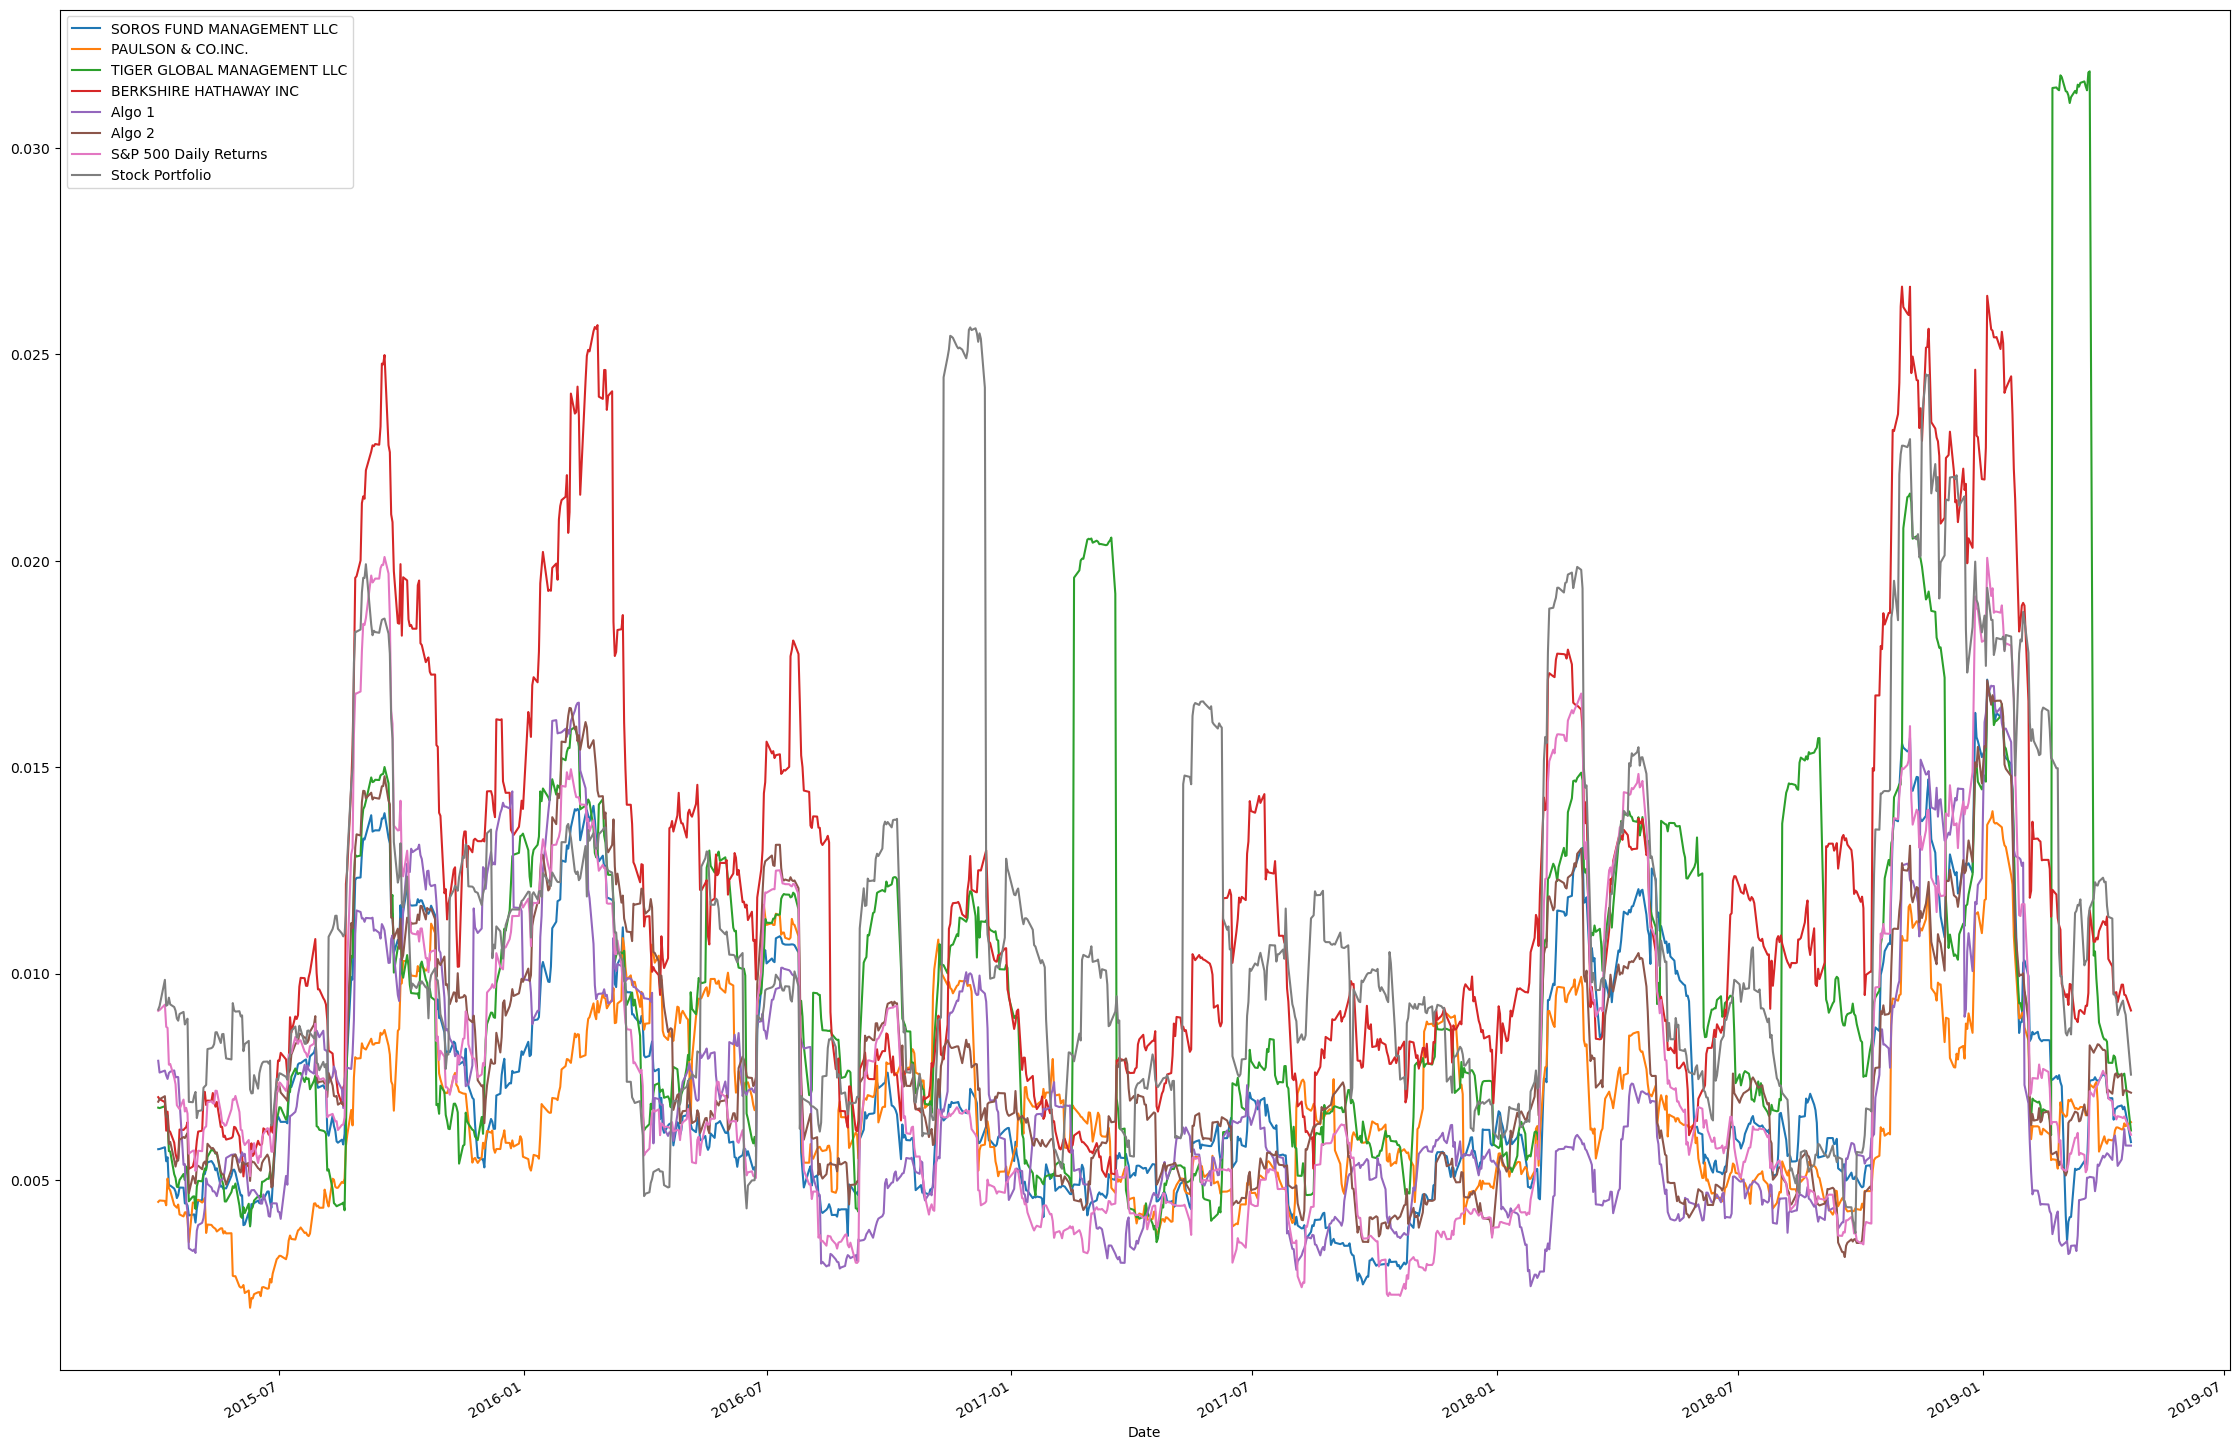

In [71]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window with rolling method chained with std method
portfolio_volatility_with_stocks_std_21 = total_daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
portfolio_volatility_with_stocks_std_21.plot(figsize=(28,20))


### Calculate and plot the correlation

In [72]:
# Calculate and plot the correlation
# Calculate the correlation with .corr method
portfolio_with_stocks_correlation = total_daily_returns.corr()
# Display de correlation matrix by calling the newly saved variable
portfolio_with_stocks_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns,Stock Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699931,0.561088,0.754857,0.321377,0.826765,0.837783,0.583052
PAULSON & CO.INC.,0.699931,1.000000,0.434633,0.545317,0.269690,0.678364,0.669637,0.416103
TIGER GLOBAL MANAGEMENT LLC,0.561088,0.434633,1.000000,0.425185,0.163500,0.507078,0.623848,0.460154
BERKSHIRE HATHAWAY INC,0.754857,0.545317,0.425185,1.000000,0.294809,0.688856,0.751928,0.538149
Algo 1,0.321377,0.269690,0.163500,0.294809,1.000000,0.287681,0.279168,0.152739
Algo 2,0.826765,0.678364,0.507078,0.688856,0.287681,1.000000,0.858687,0.576766
S&P 500 Daily Returns,0.837783,0.669637,0.623848,0.751928,0.279168,0.858687,1.000000,0.672234
Stock Portfolio,0.583052,0.416103,0.460154,0.538149,0.152739,0.576766,0.672234,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

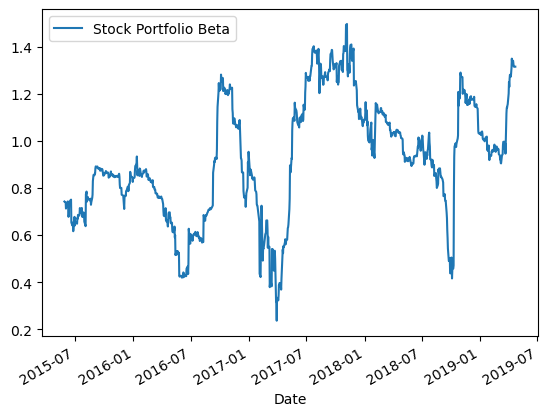

In [74]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio by calling rolling with window size 60 on Stock Portfolio column and chaining with cov method with parameter of S&P 500 column
covariance_stockport_rolling = total_daily_returns['Stock Portfolio'].rolling(window=60).cov(total_daily_returns['S&P 500 Daily Returns'])

# Calculate variance of S&P 500 on SP500 column with rolling method and var method chained
variance_stockport_rolling = total_daily_returns['S&P 500 Daily Returns'].rolling(window=60).var()

# Computing beta
stockport_beta_rolling = covariance_stockport_rolling / variance_stockport_rolling
stockport_beta_rolling

# Plot beta trend
ax = stockport_beta_rolling.plot()
ax.legend(['Stock Portfolio Beta'])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [78]:
# Calculate Annualized Sharpe Ratios

# get annualized daily returns by calling .mean on daily returns dataframe and multiplying by 252
daily_return_stockport_annualized = total_daily_returns.mean() * 252

# calculate volatility for all portoflios
portfolio_stockport_volatility_annualized = total_daily_returns.std() * np.sqrt(252)
portfolio_stockport_volatility_annualized

# save market returns annualized to new variable
benchmark_return_stockport_annualized = daily_return_stockport_annualized['S&P 500 Daily Returns']


# perform sharpe ratio calc and save to new variable
sharpe_ratios_stockport = (daily_return_stockport_annualized - benchmark_return_stockport_annualized) / portfolio_stockport_volatility_annualized
sharpe_ratios_stockport

SOROS FUND MANAGEMENT LLC     -0.351738
PAULSON & CO.INC.             -1.270765
TIGER GLOBAL MANAGEMENT LLC   -0.627610
BERKSHIRE HATHAWAY INC         0.168276
Algo 1                         0.681935
Algo 2                        -0.168852
S&P 500 Daily Returns          0.000000
Stock Portfolio                0.691843
dtype: float64

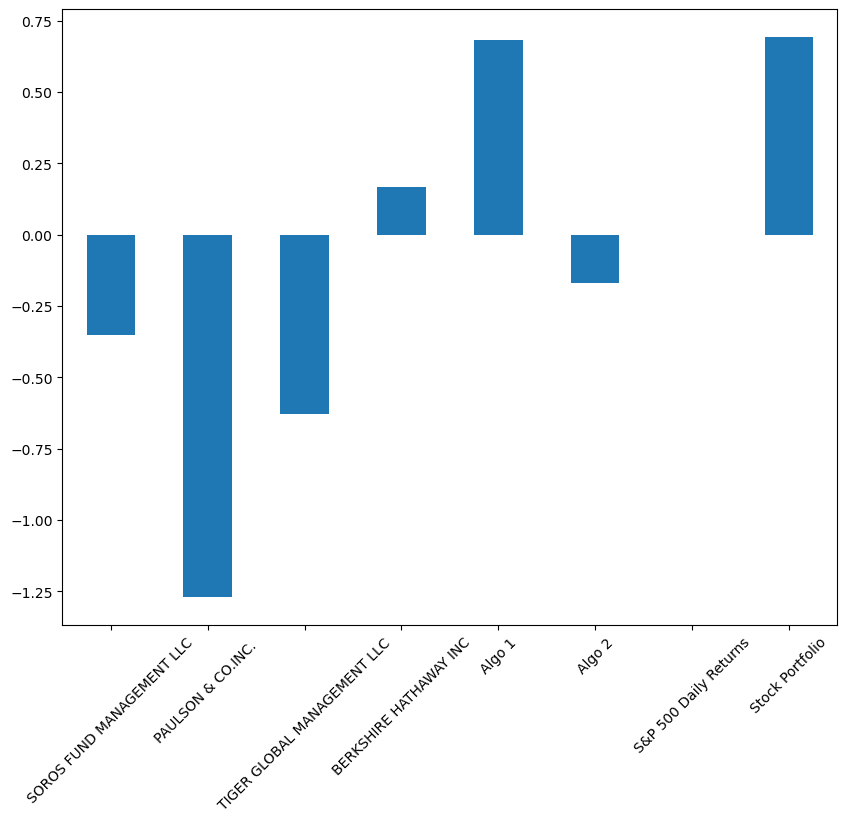

In [79]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_stockport.plot(kind='bar', figsize=(10, 8))

plt.xticks(rotation=45)
plt.show()

### How does your portfolio do?

Write your answer here!

With a simple even weighted portoflio, in terms of risk, the stock portoflio outperforms algo 1 slightly, and outperforms the market as well. In this sense, on a risk-adjusted basis, you should invest in the Personally Constructed Portfolio, as you are getting more Return per unit of Risk, and outperforming a buy-and-hold Stock Market Index Strategy. 